<a href="https://colab.research.google.com/github/laxmipriyapadegal2024/IEEECSAIML/blob/main/IEEECSAIMLlevel0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Level 0**

In [1]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt

In [3]:
#extracting data from data set
df=pd.read_csv("data.csv")

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19872 entries, 0 to 19871
Columns: 785 entries, label to pixel784
dtypes: float64(361), int64(424)
memory usage: 119.0 MB
None
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0      30.0      43.0       0.0   
3       0  ...       3.0       0.0       0.0       0.0

In [5]:
#Shape
print("Shape: ",df.shape)
print("Column: ",df.columns)

Shape:  (19872, 785)
Column:  Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [6]:
#Filling missing values
missing=df.isnull().sum().sum()
print("Missing values: ",missing)

Missing values:  361


In [7]:
df.fillna(0,inplace=True)

In [8]:
print("Total missing values after cleaning: ",df.isnull().sum().sum())

Total missing values after cleaning:  0


In [9]:
labels=df.iloc[:,0].values
images=df.iloc[:,1:].values
images=images.reshape(-1,28,28)
print(images.shape)
print(labels.shape)
#Checking the grey scale format using 1 image
image1=images[0]
print(image1.shape)

(19872, 28, 28)
(19872,)
(28, 28)


image1.shape is (28,28)

That means it is an image in 28x28 format
    which means there's only one entry for each pixel, not 3

for rgb the shape of image1 would be (28,28,3)

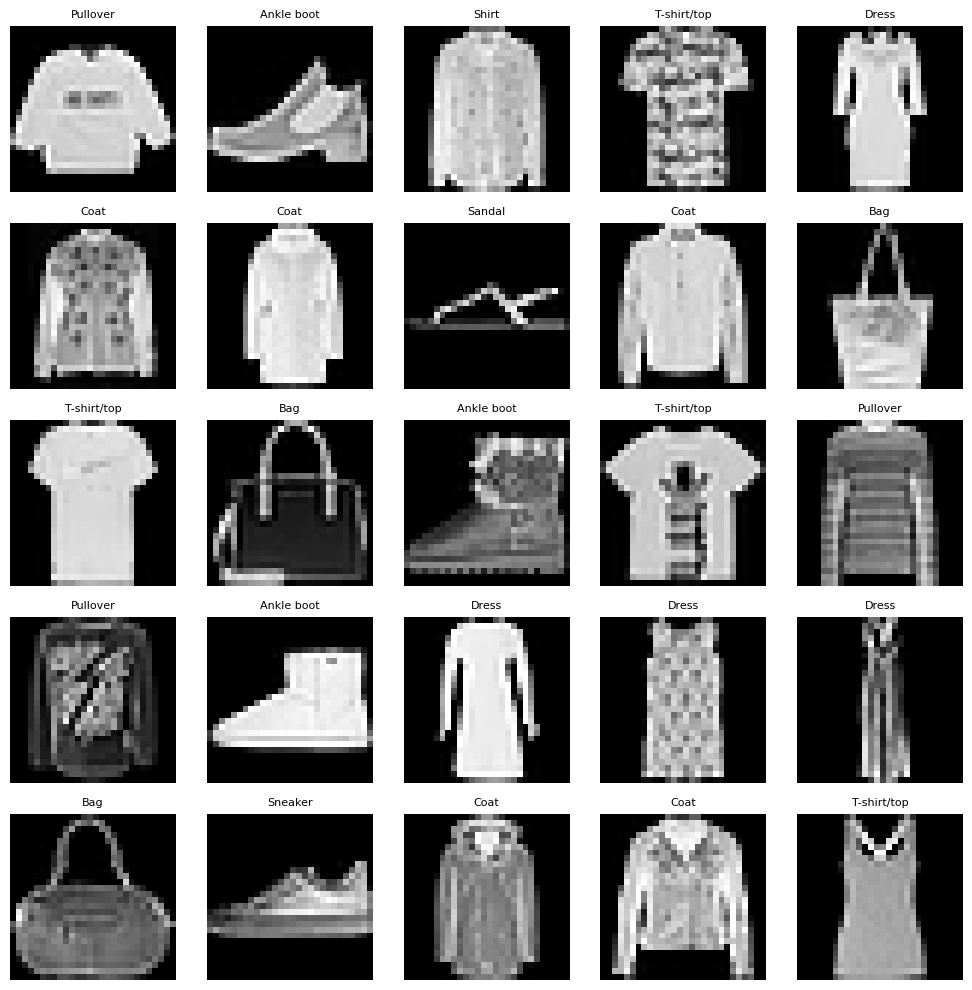

In [10]:
label_names=[                     #assumed based on Fasion-MNIST
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#Displaying the images with their labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(label_names[labels[i]], fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

**Level 1**

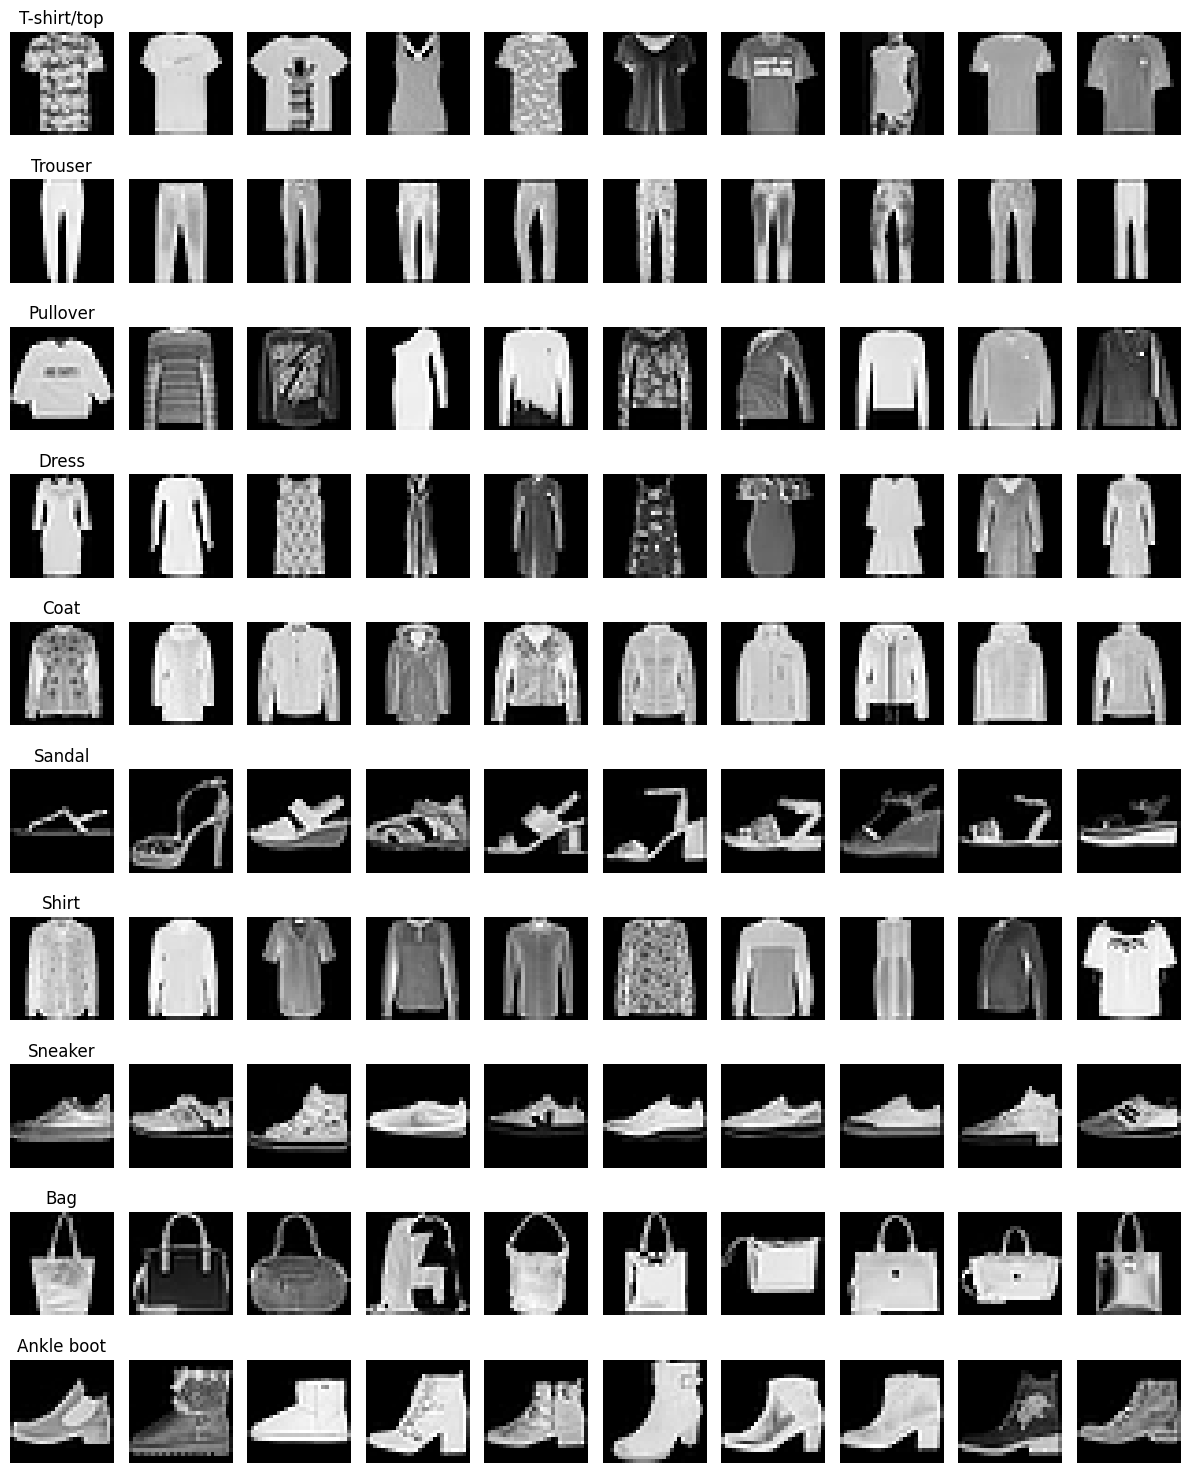

In [11]:
labels=df.iloc[:,0].values
images=df.iloc[:,1:].values.reshape(-1,28,28)
labels_unique=np.unique(labels)
label_names=[                     #assumed based on Fasion-MNIST
  "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(12,15))
for i, label in enumerate(labels_unique):
  #selecting 10 images from each category
  idxs = np.where(labels == label)[0][:10]

  for j, idx in enumerate(idxs):
    plt.subplot(len(labels_unique), 10, i * 10 + j + 1)
    plt.imshow(images[idx], cmap="gray")
    plt.axis("off")
    if j == 0:
      plt.title(f"{label_names[i]}")
plt.tight_layout()
plt.show()

In [12]:
#Summary of statistics of the data
pixel_values = images.flatten()
print(f"Min Pixel Value: {pixel_values.min()}")
print(f"Max Pixel Value: {pixel_values.max()}")
print(f"Mean Pixel Value: {pixel_values.mean():.2f}")
print(f"Standard Deviation: {pixel_values.std():.2f}")

Min Pixel Value: 0.0
Max Pixel Value: 255.0
Mean Pixel Value: 72.70
Standard Deviation: 89.82


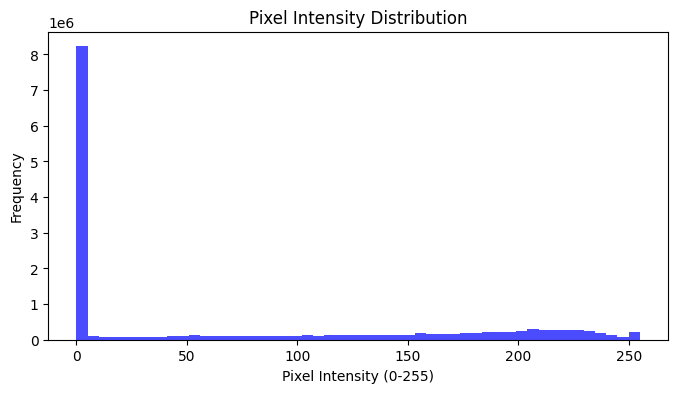

In [13]:
#Visualizing the data using a histogram
plt.figure(figsize=(8, 4))
plt.hist(pixel_values, bins=50, color="blue", alpha=0.7)
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

since majority of pixels are clustered at 0, we must normalize the data

**Level 2**

In [14]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

We must do these first

```
# Load dataset
df=pd.read_csv("data.csv")
# Data Cleaning
df.fillna(0,inplace=True)
```



In [15]:
X = df.iloc[:, 1:].values  # Pixel values
y = df.iloc[:, 0].values   # Labels

# Normalize pixel values convert range 0-255 to 0-1
X = X / 255.0

# Making our testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (15897, 784)
Test set shape: (3975, 784)


We are going to use Logistic Regression since we must predict the label which is one of the 10 labels and is not a value

In [16]:
# Train the Model
model = LogisticRegression(max_iter=1000, C=0.1, penalty="l2", solver="saga")
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1000, solver='saga')

In [17]:
# Evaluating accuracy
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8478


Using SHAP (SHapley Additive exPlanations) to analyze which pixels contribute most to the prediction

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


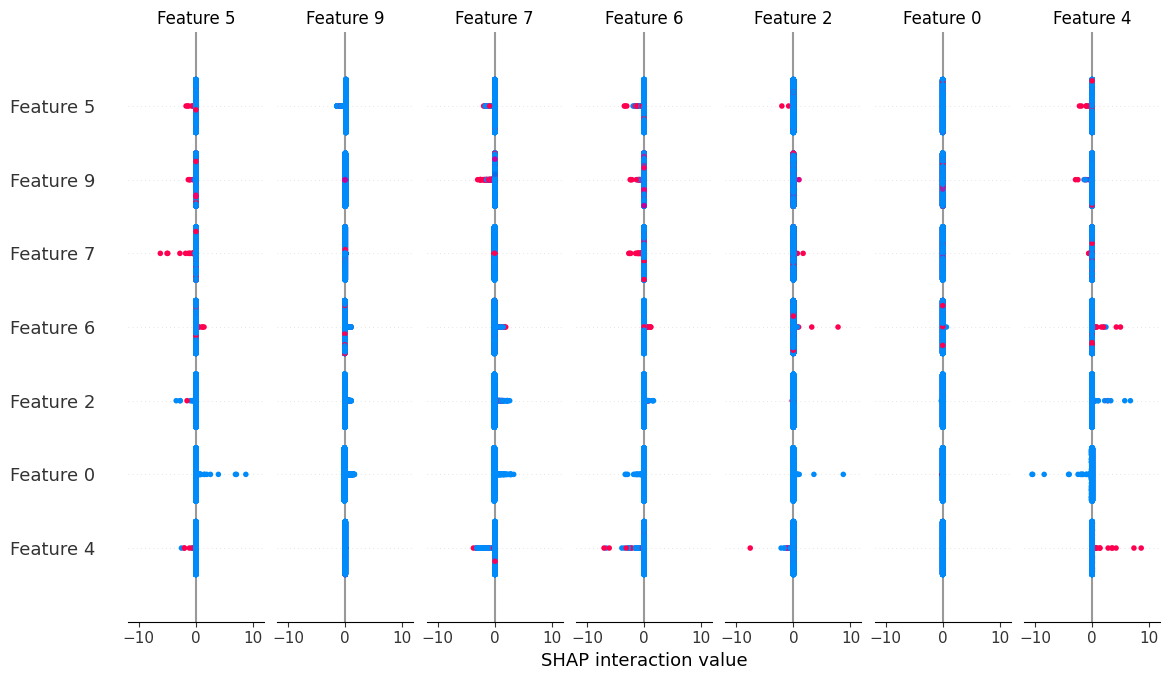

In [19]:
# SHAP Explainer
explainer = shap.LinearExplainer(model, X_train_scaled, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_scaled)
# SHAP summary
shap.summary_plot(shap_values, X_test_scaled)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}
log_reg = LogisticRegression(max_iter=1000)
# Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")
print(f"Best Model Accuracy on Test Set: {best_model.score(X_test_scaled, y_test):.4f}")

In [ ]:
mean_shap_values = np.abs(shap_values).mean(axis=0)

top_n = 50
important_feature_indices = np.argsort(mean_shap_values)[-top_n:]

X_train_selected = X_train_scaled[:, important_feature_indices]
X_test_selected = X_test_scaled[:, important_feature_indices]

best_model.fit(X_train_selected, y_train)
optimized_accuracy = best_model.score(X_test_selected, y_test)
print(f"Optimized Model Accuracy with Feature Selection: {optimized_accuracy:.4f}")

In [ ]:
balanced_model = LogisticRegression(max_iter=1000, class_weight='balanced', C=best_params['C'], penalty=best_params['penalty'], solver='saga')
balanced_model.fit(X_train_scaled, y_train)
print(f"Balanced Model Accuracy: {balanced_model.score(X_test_scaled, y_test):.4f}")